In [26]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [27]:
# Load and Inspect Data
snp_prices = pd.read_csv('/home/trungenial/Desktop/my-project/S&P-500/snp_prices.csv', index_col='Date', parse_dates=True)
market_caps = pd.read_csv('/home/trungenial/Desktop/my-project/S&P-500/market_caps.csv', index_col='Symbol')

# Display the first few rows of each dataset
print("S&P 500 Prices:")
print(snp_prices.head())
print("\nMarket Capitalizations:")
print(market_caps.head())

S&P 500 Prices:
                     A        AAPL        ABBV        ABNB         ABT  \
Date                                                                     
2024-04-01  144.484833  169.230911  174.406769  163.369995  109.851326   
2024-04-02  143.105103  168.046494  174.339233  160.110001  109.782715   
2024-04-03  142.668350  168.852692  171.097336  159.339996  109.057495   
2024-04-04  140.296005  168.026611  161.998764  158.839996  107.910873   
2024-04-05  143.055466  168.783020  164.024963  161.770004  108.979103   

                 ACGL         ACN        ADBE         ADI        ADM  ...  \
Date                                                                  ...   
2024-04-01  87.777443  335.022888  502.089996  193.409790  60.075546  ...   
2024-04-02  86.997704  332.346008  499.209991  191.698212  60.412781  ...   
2024-04-03  87.701378  328.217133  497.010010  192.170380  60.364605  ...   
2024-04-04  86.617340  326.429260  487.109985  188.816025  60.933083  ...   
202

In [28]:
# Calculate Market Capitalization Weights
total_market_cap = market_caps['Market Cap'].sum()
market_caps['Weight'] = market_caps['Market Cap'] / total_market_cap

# Display the updated market_caps DataFrame
print("Market Capitalizations with Weights:")
print(market_caps.head())

Market Capitalizations with Weights:
          Market Cap    Weight
Symbol                        
MMM      73320284160  0.001460
AOS       9257620480  0.000184
ABT     220050522112  0.004383
ABBV    309659959296  0.006168
ACN     178004230144  0.003546


In [29]:
# Apply Weights to Price Data
weighted_prices = snp_prices.mul(market_caps['Weight'], axis=1)

# Display the first few rows of the weighted prices
print("Weighted Prices:")
print(weighted_prices.head())

Weighted Prices:
                   A       AAPL      ABBV      ABNB       ABT      ACGL  \
Date                                                                      
2024-04-01  0.084275  10.033839  1.075749  0.231591  0.481493  0.060521   
2024-04-02  0.083470   9.963614  1.075333  0.226970  0.481193  0.059983   
2024-04-03  0.083216  10.011414  1.055337  0.225878  0.478014  0.060469   
2024-04-04  0.081832   9.962435  0.999216  0.225169  0.472988  0.059721   
2024-04-05  0.083441  10.007283  1.011714  0.229323  0.477670  0.062219   

                 ACN      ADBE       ADI       ADM  ...       WTW        WY  \
Date                                                ...                       
2024-04-01  1.187866  1.502380  0.342328  0.026338  ...  0.172095  0.012917   
2024-04-02  1.178375  1.493763  0.339299  0.026486  ...  0.168551  0.012870   
2024-04-03  1.163736  1.487180  0.340135  0.026465  ...  0.169489  0.012692   
2024-04-04  1.157396  1.457556  0.334198  0.026714  ...  0.167

In [30]:
# Normalize Weighted Prices
weighted_prices_normalized = (weighted_prices - weighted_prices.mean()) / weighted_prices.std()

# Display the first few rows of the normalized weighted prices
print("Normalized Weighted Prices:")
print(weighted_prices_normalized.head())

Normalized Weighted Prices:
                   A      AAPL      ABBV      ABNB       ABT      ACGL  \
Date                                                                     
2024-04-01  1.024832 -2.183680 -0.340935  1.990748 -0.375215 -1.332514   
2024-04-02  0.847785 -2.235896 -0.345089  1.737080 -0.382163 -1.466745   
2024-04-03  0.791740 -2.200354 -0.544508  1.677164 -0.455600 -1.345608   
2024-04-04  0.487321 -2.236773 -1.104190  1.638258 -0.571708 -1.532224   
2024-04-05  0.841415 -2.203426 -0.979552  1.866249 -0.463538 -0.908542   

                 ACN      ADBE       ADI       ADM  ...       WTW        WY  \
Date                                                ...                       
2024-04-01 -0.029050  0.244692 -1.872152  0.979439  ... -0.710018  2.791719   
2024-04-02 -0.123747  0.185701 -2.007952  1.045800  ... -0.907128  2.711539   
2024-04-03 -0.269810  0.140639 -1.970489  1.036320  ... -0.854963  2.409336   
2024-04-04 -0.333058 -0.062144 -2.236630  1.148184  ... -0

In [31]:
# Perform PCA
pca = PCA(n_components=1)  # Only retain the first principal component
snp_pca = pca.fit_transform(weighted_prices_normalized)

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.49415202]


In [32]:
# Create PCA DataFrame
snp_pca_df = pd.DataFrame(data=snp_pca, index=snp_prices.index, columns=['S&P 500 PCA'])

# Display the first few rows of the PCA DataFrame
print("PCA DataFrame:")
print(snp_pca_df.head())

PCA DataFrame:
            S&P 500 PCA
Date                   
2024-04-01   -20.869115
2024-04-02   -21.438455
2024-04-03   -21.607826
2024-04-04   -22.410665
2024-04-05   -21.749026


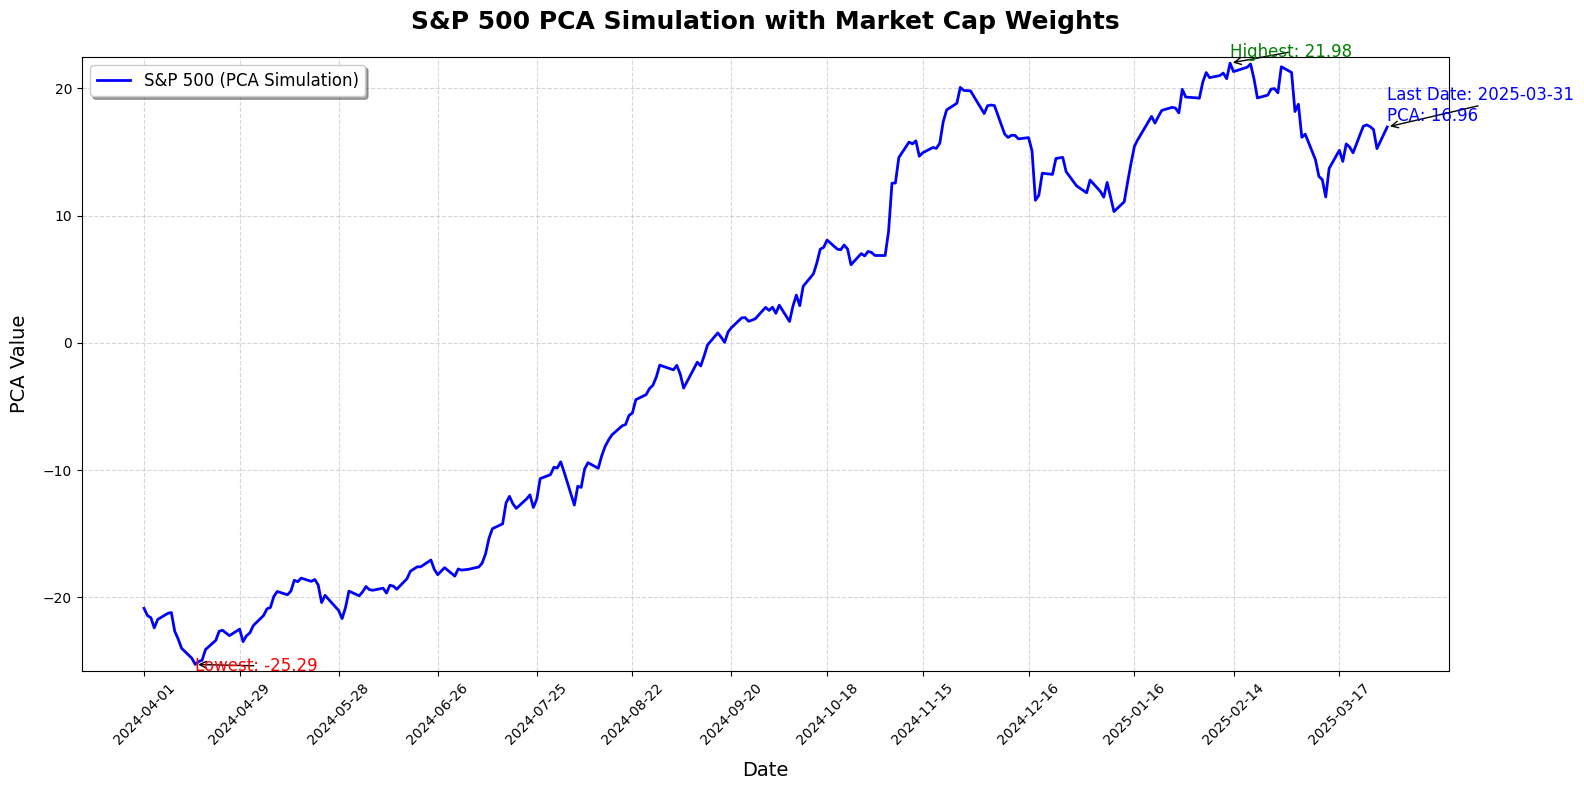

In [ ]:
# Visualize PCA Results with Enhanced Formatting
plt.figure(figsize=(16, 8))

# Plot PCA data
plt.plot(snp_pca_df.index, snp_pca_df['S&P 500 PCA'], color='blue', linewidth=2, label="S&P 500 (PCA Simulation)")

# Add title and labels
plt.title("S&P 500 PCA Simulation with Market Cap Weights", fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("PCA Value", fontsize=14, labelpad=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

# Format x-axis
xticks = snp_pca_df.index
plt.xticks(xticks[::20], [x.strftime('%Y-%m-%d') for x in xticks[::20]], rotation=45, fontsize=10)

# Format y-axis
y_min, y_max = snp_pca_df['S&P 500 PCA'].min(), snp_pca_df['S&P 500 PCA'].max()
plt.ylim(y_min - 0.5, y_max + 0.5)

# Annotate highest and lowest points
max_pca_date = snp_pca_df['S&P 500 PCA'].idxmax()
min_pca_date = snp_pca_df['S&P 500 PCA'].idxmin()
plt.annotate(f"Highest: {snp_pca_df['S&P 500 PCA'].max():.2f}",
            xy=(max_pca_date, snp_pca_df['S&P 500 PCA'].max()),
            xytext=(max_pca_date, snp_pca_df['S&P 500 PCA'].max() + 0.5),
            arrowprops=dict(facecolor='green', arrowstyle='->'),
            fontsize=12, color='green')

plt.annotate(f"Lowest: {snp_pca_df['S&P 500 PCA'].min():.2f}",
            xy=(min_pca_date, snp_pca_df['S&P 500 PCA'].min()),
            xytext=(min_pca_date, snp_pca_df['S&P 500 PCA'].min() - 0.5),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=12, color='red')

# Annotate last date
last_date = snp_pca_df.index[-1]
last_pca = snp_pca_df['S&P 500 PCA'].iloc[-1]
plt.annotate(f"Last Date: {last_date.strftime('%Y-%m-%d')}\nPCA: {last_pca:.2f}",
            xy=(last_date, last_pca),
            xytext=(last_date, last_pca + 0.5),
            arrowprops=dict(facecolor='blue', arrowstyle='->'),
            fontsize=12, color='blue')

# Optimize layout
plt.tight_layout()

# Show plot
plt.show()